In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据预处理

In [48]:
boston = datasets.load_boston()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [49]:
boston.feature_names # 我们判断 RM 和 房价的线性关系

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [50]:
x = boston.data[:, 5]
y = boston.target
print(x.shape, y.shape)

(506,) (506,)


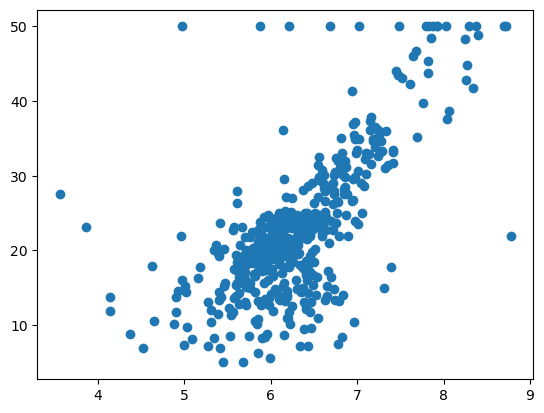

In [51]:
plt.scatter(x, y)
plt.show()

In [52]:
x = x[y < 50]
y = y[y < 50] # 将不符合规律的点删掉

### 线性回归算法预测

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=666)

In [71]:
x_train.shape

(392,)

In [72]:
from playML.SimLinearRegression import SimLinearRegression

In [73]:
reg = SimLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [74]:
reg.a_

7.860854356268954

In [75]:
reg.b_

-27.459342806705536

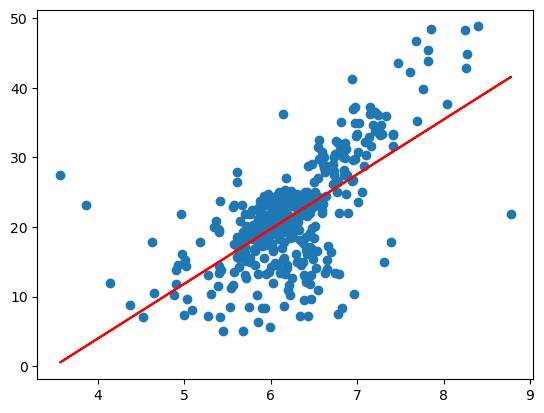

In [76]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [77]:
y_predict = reg.predict(x_test)

### 算法误差预测

#### MSE

In [78]:
mse_test = np.sum((y_predict - y_test) ** 2) / len(y_test)
mse_test

24.156602134387438

#### RMSE

In [79]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test # 即房产预测的误差在 6.1w 美元左右

4.914936635846635

#### MAE

In [80]:
mae_test = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae_test

3.543097440946387

#### R Square

In [81]:
1 - mse_test / np.var(y_test)

0.6129316803937322